# Ajuste Exponêncial

### $$y = a + ce^{ax}$$

In [ ]:
# @title Classe

import numpy as np
import pandas as pd

class Euler:
  """Ajusta os dados de entrada em uma curva exponencial: y = a * e^(bx)."""

  from typing import Any

  def __init__(self, x: Any, y:Any) -> Any:
    """
    x (Any): list
    y (Any): list
    """
    self.x = x
    self.y = y

  def grafico(self) -> object:
    """Exibe o grafico de y em função de x."""

    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 4))
    plt.plot(self.x, self.y, 'ro', c='b')

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

    plt.xlabel('Abscissa')
    plt.ylabel('Ordenada')
    plt.title('Visualisação y(x)')
    plt.legend(['Dados'])

    return plt.show()

  def ajustar(self) -> object:
    """
    Ajusta os dados e calcula os coeficientes (a, b).
    Exibe o gráfico com a curva ajustada.
    """
    import numpy as np
    from sympy import nsolve, Symbol, exp
    import matplotlib.pyplot as plt
    import scipy.stats as stats

    # Aplica o logaritimo natural para y, temos z = ln(Y_i)
    self.z = np.log(self.y)

    # Coeficiente de determinação R^2:

    # Modelo linear ao ln(y) = ln(a) + bx
    slope, intercept, r_value, p_value, std_err = stats.linregress(self.x, self.z)
    # Valores ajustados de ln(y)
    ln_y_pred = intercept + slope * self.x
    # Calculo do SSR (Soma dos Quadrados dos Resíduos)
    ssr = np.sum((self.z - ln_y_pred) ** 2)
    # Calculo do SST (Soma Total dos Quadrados)
    sst = np.sum((self.z - np.mean(self.z)) ** 2)
    # Calculo do coeficiente de determinação R^2
    r_squared = 1 - (ssr / sst)

    # Termos da matriz dos coeficientes:
    i_1_1 = np.sum(self.x * self.x)
    i_1_2 = np.sum(self.x)
    i_2_1 = i_1_2
    i_2_2 = len(self.x)

    # Vetor dos termos independentes:
    r_1 = np.sum(self.x * self.z)
    r_2 = np.sum(self.z)

    # Coeficientes:
    a = Symbol('a')
    b = Symbol('b')

    # Equações:
    equacao_1 = (i_1_1 * a) + (i_1_2 * b) - r_1
    equacao_2 = (i_2_1 * a) + (i_2_2 * b) - r_2

    # Calculo:
    self.a, self.b = nsolve((equacao_1, equacao_2), (a, b), (-1, 1))

    # Coeficientes:
    self.b = float(self.b)
    self.a = float(self.a)
    self.c = float(np.exp(self.b))

    # Função ajuste e:
    self.f = lambda x: (self.c * (np.exp(self.a * x)))

    # y = e^ax:
    self.x_ajustado = np.linspace(np.min(self.x), np.max(self.x), 100)
    self.y_ajustado = np.array([self.f(i) for i in self.x_ajustado])

    # Gráfico:
    plt.figure(figsize=(14, 4))
    plt.plot(self.x, self.y, 'ro', c='b')
    plt.plot(self.x_ajustado, self.y_ajustado, c='r')

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

    plt.xlabel('Abscissa')
    plt.ylabel('Ordenada')
    plt.title(f"$a$ = {str(round(self.a, 4))} $b$ = {str(round(self.b, 4))} $c$ = {str(round(self.c, 4))} || $R^2$ = {r_squared:.4f}")
    plt.legend(['Dados', "$ce^{ax}$"])

    return plt.show()

  def interpolar(self, i:list) -> object:
    """Interpolação exponencial"""
    import numpy as np
    self.i = np.array([i]) # lista contendo o valor ou valores que serão interpolados;
    self.valores_interpolados = np.array([self.f(x) for x in self.i])

    return self.valores_interpolados

# Aplicações:

## Case 01: Ajuste perfeito

In [ ]:
# @title Dados:

x = np.array([-1, -0.7, -0.4, -0.1,
              0.2, 0.5, 0.8, 1])

y = np.array([36.547, 17.264, 8.155, 3.852,
              1.820, 0.860, 0.406, 0.246])

# Tabela
dataframe = pd.DataFrame({'Abscissa (x)': x, 'Ordenada (y)': y})

dataframe

,Abscissa (x),Ordenada (y)
0,-1.0,36.547
1,-0.7,17.264
2,-0.4,8.155
3,-0.1,3.852
4,0.2,1.820
5,0.5,0.860
6,0.8,0.406
7,1.0,0.246


In [ ]:
# @title Instância
# Crie uma instância da classe Euler:
perfeito = Euler(x, y)

<ipython-input-3-801860b2cc80>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(self.x, self.y, 'ro', c='b')


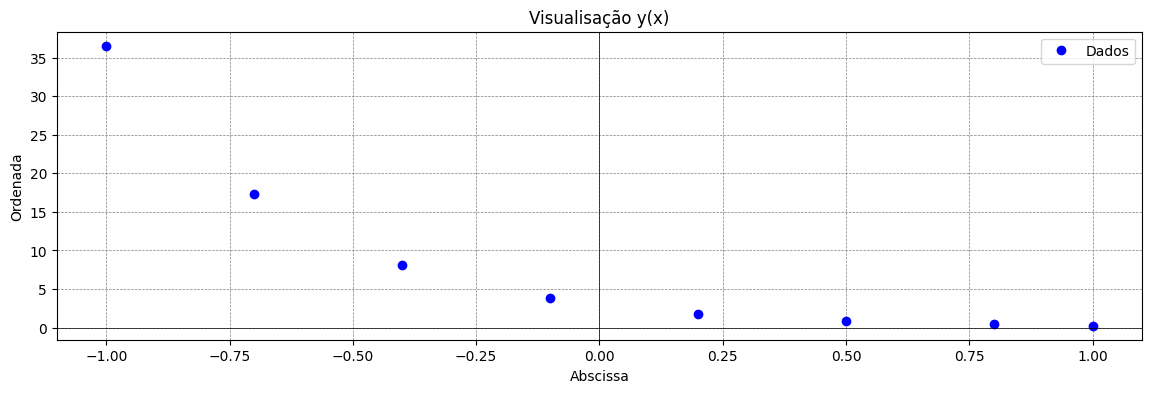

In [ ]:
# @title Visualize os dados de entrada:

# Visualize o comportamento dos dados de entrada:
perfeito.grafico()

<ipython-input-3-801860b2cc80>:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(self.x, self.y, 'ro', c='b')


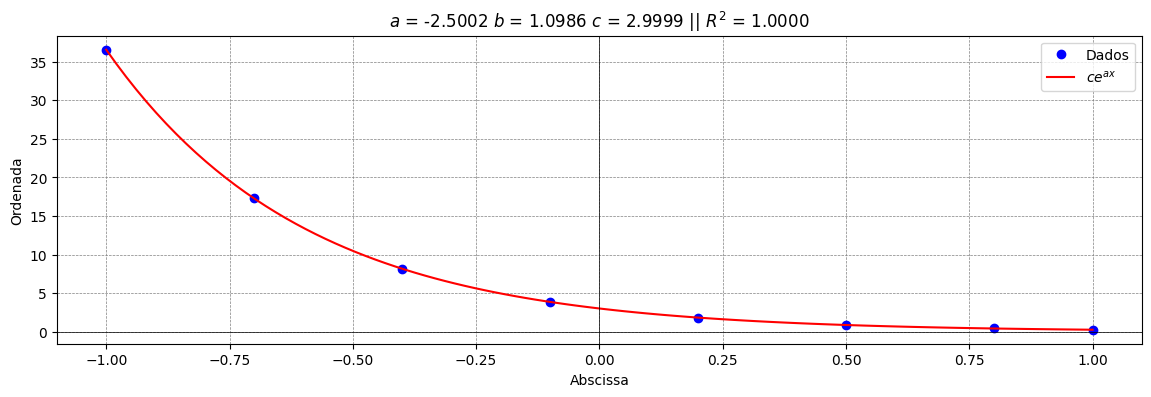

In [ ]:
# @title Ajuste os dados caso o comportamento dos dados de entrada se encaixe em um ajuste exponencial:
perfeito.ajustar()

## Case 02: Processo de purificação

Os engenheiros estão trabalhando em um processo de purificação de um fluido industrial onde a concentração de impurezas é monitorada ao longo do tempo. O objetivo é prever a quantidade de impurezas remanescentes após determinado tempo de operação, para que possam otimizar o processo.

1. Ajustar os dados a uma curva exponencial para encontrar a taxa de decaimento.
2. Prever a concentração de impurezas após 10 horas de operação.

In [ ]:
# @title Dados coletados:

# Dados
tempo = np.array([0, 1, 2, 3,
                  4, 5, 6, 7])

concentracao = np.array([120.77, 54.56, 35.67, 20.32,
                         6.59, 2.89, 1.89, 0.94])

# Tabela
dados = pd.DataFrame({'Tempo (h)': tempo, 'Concentração (mg/L)': concentracao})

dados

,Tempo (h),Concentração (mg/L)
0,0,120.77
1,1,54.56
2,2,35.67
3,3,20.32
4,4,6.59
5,5,2.89
6,6,1.89
7,7,0.94


<ipython-input-3-801860b2cc80>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(self.x, self.y, 'ro', c='b')


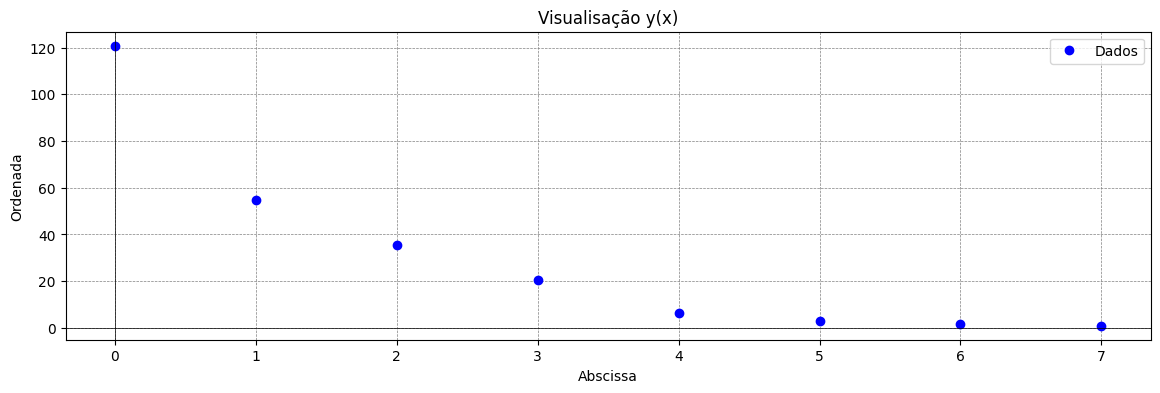

In [ ]:
# @title Comportamento dos dados de entrada:
purificacao = Euler(tempo, concentracao)
purificacao.grafico()

<ipython-input-3-801860b2cc80>:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(self.x, self.y, 'ro', c='b')


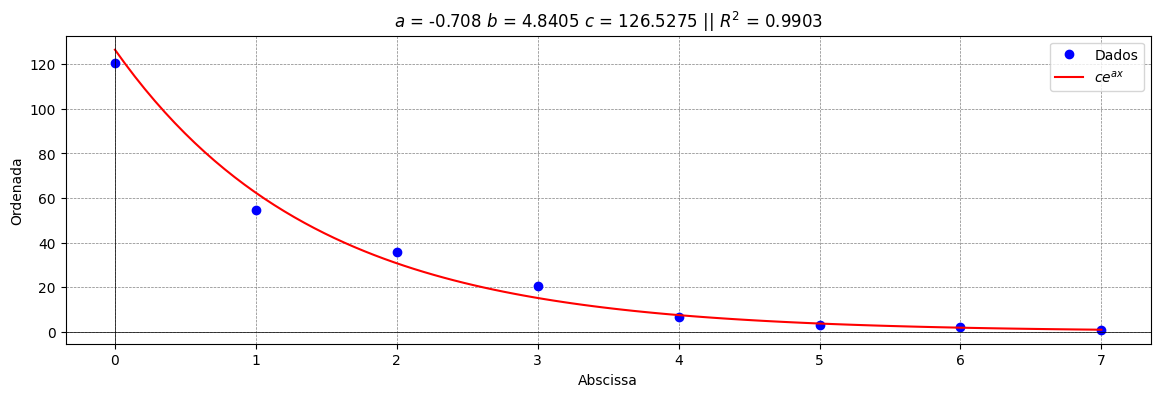

In [ ]:
# @title Ajuste:
purificacao.ajustar()

In [ ]:
# @title Previsão (t = 10h):
purificacao.interpolar([10])

array([[0.10654322]])

Portanto, após 10 horas, a concentração de impurezas será próxima de $0,10 mg/L$.